# Projet Python
## Classification d'images avec réseaux de neurones
Wael Osmani - Salim Talout Zitan

### Introduction
Dans le cadre du *PAO Python for nummies*, nous avons réalisé un projet qui permet de classifier des images avec un réseaux de neurones.
Ces images sont des pièces vêtements, comportant en tout *10 classes différentes*.
Nous allons tout d'abord importer les données d'entraînement et de test. Ensuite nous allons définir un réseau de neurones grâce à la librairie *Keras*. Puis nous allons compiler notre modèle pour ensuite l'entraîner. Enfin nous allons évaluer la précision de notre réseau sur les données de test, puis faire de la prédiction de classes sur les données test.

### Import des librairies :

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt

### Import des données

In [2]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

32768/29515 [=================================] - 0s 1us/step


Using TensorFlow backend.


4423680/4422102 [==============================] - 0s 0us/step


Les objets **x_train**, **y_train**, **x_test** et **y_test** sont des ndarrays.

### Informations sur les données

#### Données d'entrainement

In [3]:
x_train.shape

(60000, 28, 28)

Nous avons donc 60 000 images d'entrainement de 28x28 pixels.

In [4]:
len(y_train)

60000

Nous avons aussi 60 000 labels associés aux images d'entrainement.

In [5]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

Les labels sont des chiffres entiers entre 0 et 9. Ajoutons donc les noms des labels.

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#### Données de test

In [7]:
x_test.shape

(10000, 28, 28)

Nous avons donc 10 000 images de test de 28x28 pixels.

In [8]:
len(y_test)

10000

De la même façon, nous avons 10 000 labels associés aux images de test.

### Prétraitement des données

Avant d'entrainer le modèle, voyons à quoi ressemblent nos données.

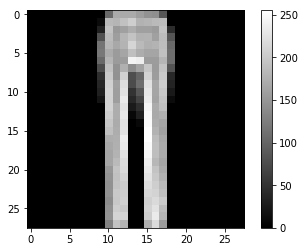

In [9]:
plt.figure()
plt.imshow(x_train[69], cmap='gray')
plt.colorbar()
plt.grid(False)

Les valeurs des pixels vont de 0 à 255. Passons ces valeurs à une échelle allant de 0 à 1.

In [10]:
x_train = x_train/255
x_test = x_test/255

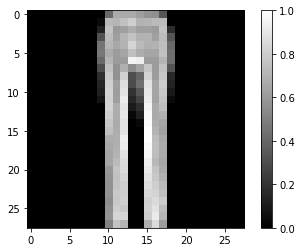

In [11]:
plt.figure()
plt.imshow(x_train[69], cmap='gray')
plt.colorbar()
plt.grid(False)

De cette manière, les pixels des données d'entrainement et de test vont de 0 à 1.

### Affichage d'un sample de données

Affichons les différentes classes présentes dans cette base de donnée.

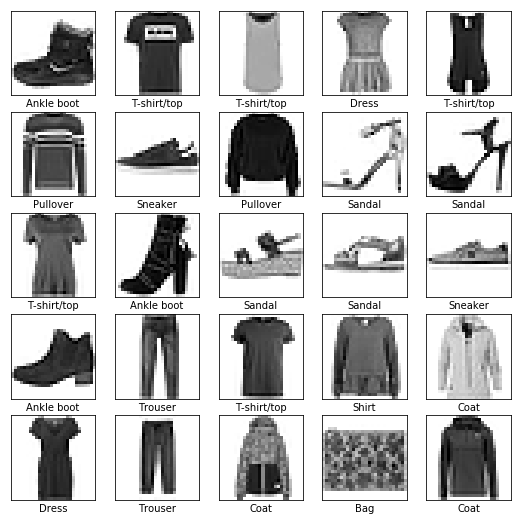

In [12]:
plt.figure(figsize=(9,9))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])

### Le modèle

#### Mise en place des couches

In [13]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation=tf.nn.relu),
    Dense(10, activation=tf.nn.softmax)
])

- La 1ère couche (Flatten) permet de transformer l'image 2D d'entrée (28x28) en vecteur 1D de 28x28 = 784 pixels.
- Ensuite, les 2 autres couches sont des couches denses.
    - La 1ère contient 128 neuronnes
    - La 2ème retourne un tableau de 10 scores, qui indique la probabilité pour chaque score que l'image appartienne à une classe.

#### Compilation du modèle

Avant d'entrainer le modèle, il faut ajouter certains paramètres.
- Nous y ajouterons un *Optimizer*, qui permet de mettre à jour le modèle en fonction des données et de la *Loss function*
- Ensuite, nous y ajouterons une *Loss function*, qui permet de tester la précision du modèle. Le but est faire tendre cette valeur vers 0.
- Enfin, nous y ajouterons un *Metrics*, qui permet de monitorer les phases d'entrainement et de test, en indiquant les images correctement classifiées.

In [14]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### Entrainement du modèle

On donne au modèle les données d'entrainement, ainsi que leurs labels. Il apprendra ensuite à associer correctement les images et leurs labels, pour ainsi pourvoir faire des prédictions sur les données de test.
Le nombre d'epochs correspond au nombre d'itérations que l'on souhaite réaliser, plus le nombre est grand, plus le modèle réussi à minimiser la Loss function. 


In [15]:
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
60000/60000 [==============================] - 4s 64us/step - loss: 0.4993 - acc: 0.8250
Epoch 2/100
60000/60000 [==============================] - 4s 59us/step - loss: 0.3749 - acc: 0.8656
Epoch 3/100
60000/60000 [==============================] - 4s 60us/step - loss: 0.3384 - acc: 0.8763
Epoch 4/100
60000/60000 [==============================] - 4s 69us/step - loss: 0.3128 - acc: 0.8838
Epoch 5/100
60000/60000 [==============================] - 4s 59us/step - loss: 0.2953 - acc: 0.8920
Epoch 6/100
60000/60000 [==============================] - 4s 59us/step - loss: 0.2810 - acc: 0.8960
Epoch 7/100
60000/60000 [==============================] - 4s 68us/step - loss: 0.2672 - acc: 0.9012
Epoch 8/100
60000/60000 [==============================] - 4s 63us/step - loss: 0.2559 - acc: 0.9052
Epoch 9/100
60000/60000 [==============================] - 4s 63us/step - loss: 0.2459 - acc: 0.9092
Epoch 10/100
60000/60000 [==============================] - 4s 63us/step - loss: 0.2379 - a

60000/60000 [==============================] - 3s 56us/step - loss: 0.0643 - acc: 0.9758
Epoch 82/100
60000/60000 [==============================] - 3s 56us/step - loss: 0.0659 - acc: 0.9751
Epoch 83/100
60000/60000 [==============================] - 3s 56us/step - loss: 0.0646 - acc: 0.9765
Epoch 84/100
60000/60000 [==============================] - 3s 55us/step - loss: 0.0637 - acc: 0.9761
Epoch 85/100
60000/60000 [==============================] - 3s 56us/step - loss: 0.0646 - acc: 0.9763
Epoch 86/100
60000/60000 [==============================] - 3s 56us/step - loss: 0.0614 - acc: 0.9775
Epoch 87/100
60000/60000 [==============================] - 3s 56us/step - loss: 0.0607 - acc: 0.9773
Epoch 88/100
60000/60000 [==============================] - 3s 56us/step - loss: 0.0615 - acc: 0.9774
Epoch 89/100
60000/60000 [==============================] - 3s 56us/step - loss: 0.0607 - acc: 0.9780
Epoch 90/100
60000/60000 [==============================] - 3s 58us/step - loss: 0.0575 - acc: 

- 10 epochs donnent une précision de 91%.
- 100 epochs donnent une précision de 98%

#### Évaluation du modèle

Voyons maintenant comment se comporte le modèle avec les données de test.

In [16]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Précision sur données de test : ', test_acc)

10000/10000 [==============================] - 0s 33us/step
Précision sur données de test :  0.8876


On voit que le modèle perd 10% de précision. Cette différence entre précision d'entrainement et de test est un exemple de *sur-apprentissage*.
Le sur-apprentissage est un phénomène en statistique, où le modèle s'adapte à un ensemble **particulier** de données, ainsi, lorsqu'on le teste sur d'autres données, celui-ci ne se généralise pas de la manière attendue, et perd en précision.

### Prédictions sur des images

Gardons ce modèle et testons de prédire les classes de quelques images.

In [17]:
predictions = model.predict(x_test)

L'objet *predictions* contient un tableau de scores pour chaque image de test.

In [18]:
predictions[0]

array([4.9478995e-18, 0.0000000e+00, 1.7241811e-26, 0.0000000e+00,
       9.3228124e-29, 6.1665331e-09, 1.7281448e-34, 2.3804911e-13,
       1.8125550e-31, 1.0000000e+00], dtype=float32)

Par exemple, la 1ère image de test appartient à la classe 9 (car c'est la plus proche de 1).
Affichons ces résultats correctement...

In [19]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)


def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

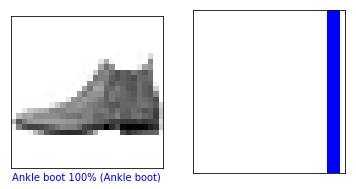

In [20]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  y_test)

Ici, le label est bien prédit.

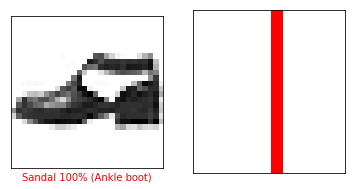

In [23]:
i = 23
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  y_test)

Pour cette image, le modèle ne trouve pas le bon label et confond une botte et une sandale.

### Conclusion
Le réseau de neuronnes perd près de 10% de précision entre les données d'apprentissage et les données de test. Cela est dû à du surapprentissage. On dit que le réseau généralise mal. Afin d'éviter ce problème, on aurait pu optimiser les nombres de neuronnes et de couches.